# Problem Statement:

Despite ongoing efforts by banks to attract and retain customers, customer churn remains a significant challenge, leading to financial losses and reduced customer satisfaction.
Understanding the factors that drive customers to leave is crucial for banks to improve retention strategies.

## Project Objective:

The goal of this project is to analyze customer churn in the banking sector to understand why customers are leaving.
After conducting the analysis, a Machine Learning model will be developed to identify key factors that significantly contribute to customer churn or attrition.
The final step is to select the most reliable model that can assign a churn probability, helping customer service teams target the right customers and optimize their efforts to reduce churn.

## Project Overview:

Customer churn refers to the process of customers discontinuing their banking services.
Banking Churn Analysis involves examining customer behavior to predict and understand why customers leave.
The objective of Banking Churn Modeling is to detect patterns and factors contributing to churn, enabling banks to take proactive steps to retain customers and enhance satisfaction.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
print(df.shape)

(10000, 14)


In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#### None of the columns is having missing values. So we don't have to perform Data Imputation.

In [7]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

### There are no duplicate records present in the dataset. So we can say there is no Data Lekage in the dataset.

# Performing Descriptive Statistical Analysis on Categorical Columns

In [10]:
df.describe(include="object")

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


#### The Surname column has very high cardinality and is not relevant for predicting customer churn, so it can be safely dropped from the dataset.
#### On the other hand, the Geography and Gender columns have low cardinality and appear to be relevant features for predicting customer churn.

# Data Wrangling

In [11]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8338,8339,15792453,More,602,Spain,Female,42,1,138912.17,1,1,1,139494.75,0
3820,3821,15763148,Stanley,576,France,Male,39,9,84719.98,1,0,0,191063.36,0
9726,9727,15662494,Goliwe,773,Spain,Male,43,7,138150.57,1,1,1,177357.16,0
5986,5987,15679738,Brown,527,Spain,Female,35,8,0.00,1,1,0,98031.53,1
6643,6644,15762123,Davide,717,Spain,Female,34,1,0.00,2,1,0,119313.74,0


#### RowNumber and CustomerId columns represents a unique value for each customer and doesn't seem relevant for predicting customer churned or not.
#### Surname column is having high cardinality* and doesn't seems relevant for predicting customer churned or not.**So we can simply drop these features.

In [12]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace= True)

### Renaming Target Variable name and its values with more appropirate values for better Analysis

In [28]:
# Rename the 'Exited' column to 'Churned'
df.rename(columns={'Exited': 'Churned'}, inplace=True)

In [29]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Churned'],
      dtype='object')

In [31]:
df['Churned'].replace({0:'No', 1:'Yes'}, inplace=True)  #Replace 0 with 'NO' and 1 with 'Yes' in the 'Churned' column

In [33]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,Yes
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,No
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,Yes
3,699,France,Female,39,1,0.00,2,0,0,93826.63,No
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,No


## Explorator Data Analysis

In [35]:
count = df['Churned'].value_counts()
count

No     7963
Yes    2037
Name: Churned, dtype: int64

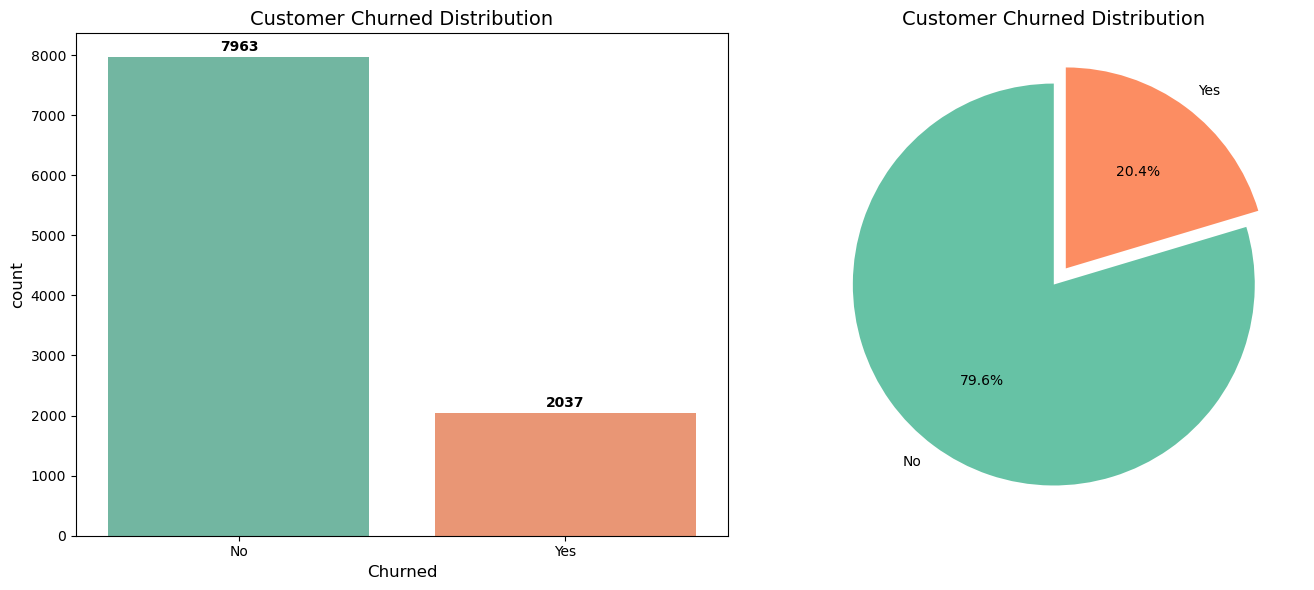

In [38]:
plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.barplot(x=count.index, y=count.values, palette='Set2')
plt.title('Customer Churned Distribution', fontsize=14)
plt.xlabel('Churned', fontsize=12)
plt.ylabel('count', fontsize=12)
# Add labels above bars
for i, v in enumerate(count.values):
    plt.text(i, v + 100, str(v), ha='center', fontweight='bold')

plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.pie(count, labels=count.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'), explode=[0, 0.1])
plt.title('Customer Churned Distribution', fontsize=14)

# Display the plots
plt.tight_layout()
plt.show()

#### There is huge class-imbalance which can lead to bias in model performance.
#### So to overcome this class-imbalance we have to use over-sampling technique from SMOTE.

In [39]:
#Visualizing Customer Churned by Gender

def countplot(column):
    plt.figure(figsize=(15,5))
    # Create the countplot
    ax = sns.countplot(x=column, data=df, hue="Churned", palette="Set2")
    
    # Add percentage labels to each bar
    for value in ax.patches:
        # Calculate percentage
        percentage = "{:.1f}%".format(100 * value.get_height() / len(df))
        # Adjust the x and y position for the text
        x = value.get_x() + value.get_width() / 2 - 0.05
        y = value.get_height()
        # Annotate each bar with the percentage
        ax.annotate(percentage, (x, y), fontweight="black", size=15)
    
    # Set title and display plot
    plt.title(f"Customer Churned by {column}", fontweight="black", size=20, pad=20)
    plt.show()

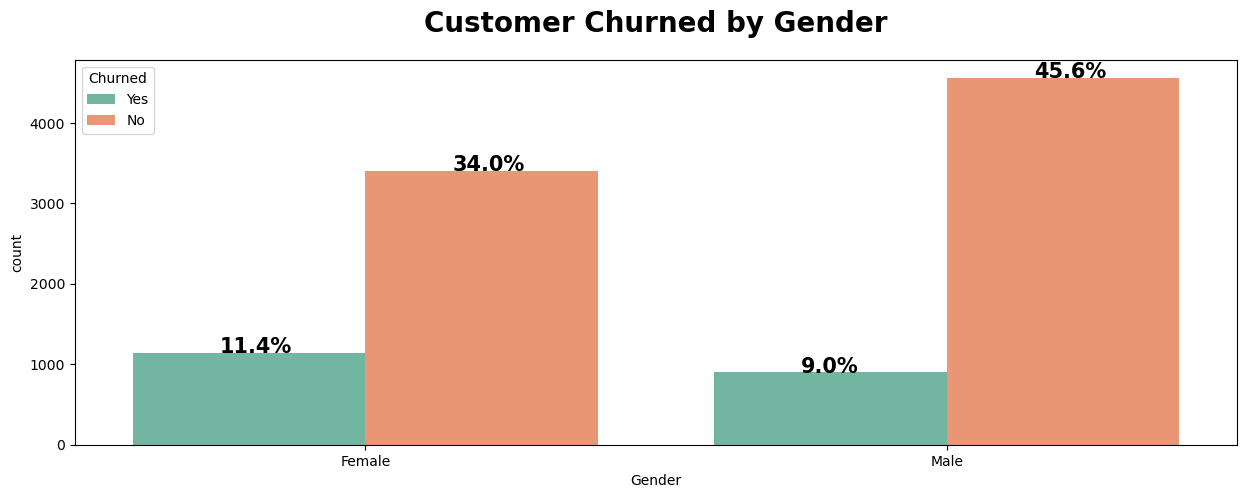

In [40]:
countplot("Gender")

#### The churned probabillity is more for Feamle Customers compared to male customers. Which means female customers are more deactivating their banking facilities compared to male customers.
## Recommendation:
### Bank can Develop targeted marketing campaigns specifically tailored to female customers. Bank can Focus on enhancing the overall customer experience for female customers.

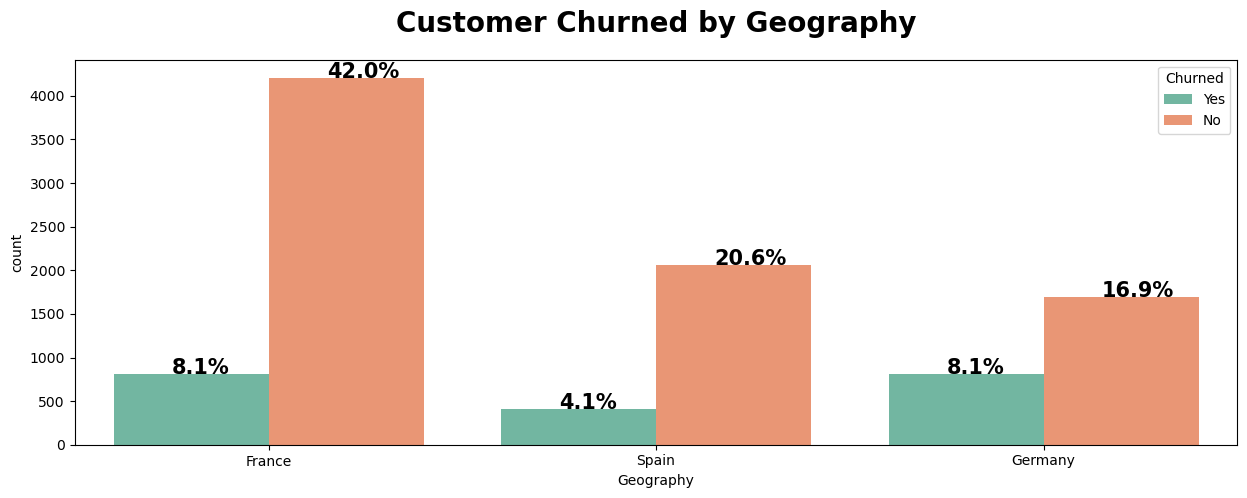

In [41]:
#Visualizing Customer Churned by Geoprahical Region.

countplot("Geography")

### Half of the customers are from France followed by Germany and Spain. Despite of the huge total customers difference between France & Germany the churned rate for France and Germany customers are same.There are almost equal customers from Spain & Germany, but the Churn rate is almost double in Germany when compared with spain.
## Recommendation:
### Bank can analyze the banking facilites & behaviour of customers from france and try to implement those on Germany customers.

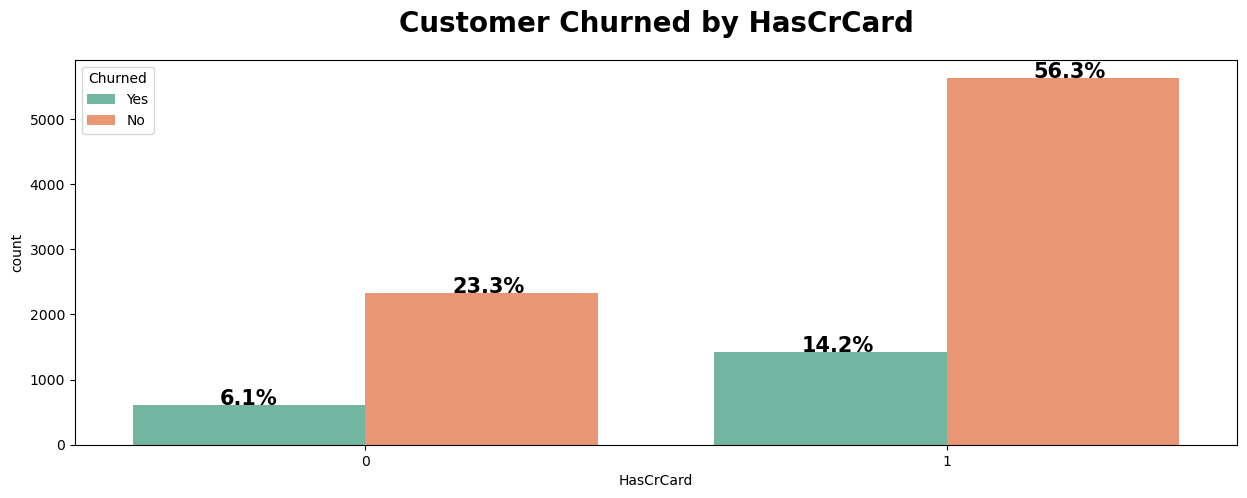

In [42]:
# Visualizing Customer Churn by "HasCrCard".

countplot("HasCrCard")

#### More than 70% of customers are having credit card.
#### The churn probability value for the both the categories is almost 1:4.
#### So credit card is not affecting the churn of customers.

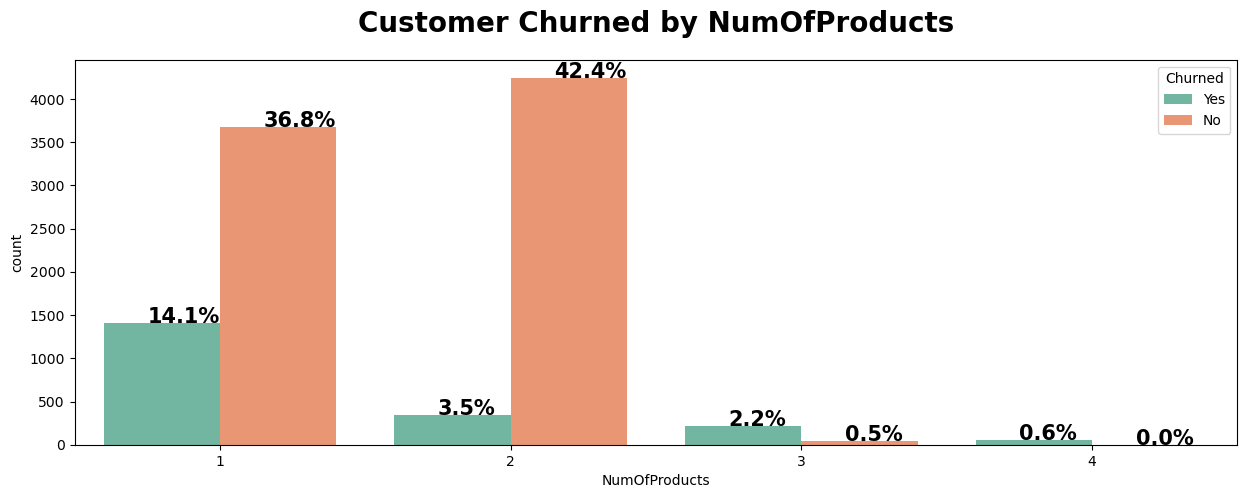

In [43]:
# Visualizing Customer Churned by "NumOfProducts".

countplot("NumOfProducts")

#### Most of the customers are having either 1 or 2 total number of banking products.
#### Very few customers are having more than 2 total number of banking products.
#### The lowest churn rate is with customers having only 2 products.
#### There is very high churn rate in customers having 1 product or more than 2 products.
### Note:
#### We can do feature engineering by grouping the customers having products more than 2 together to reduce the class imbalance. Because Class Imbalance leads to bias in model and misrepresentation of minority class.
## Recommendation:
#### The bank can try to convince the customers to have atleast 2 banking products.
#### They can provide Rewards and Incentives to the customers having atleast 2 banking products.

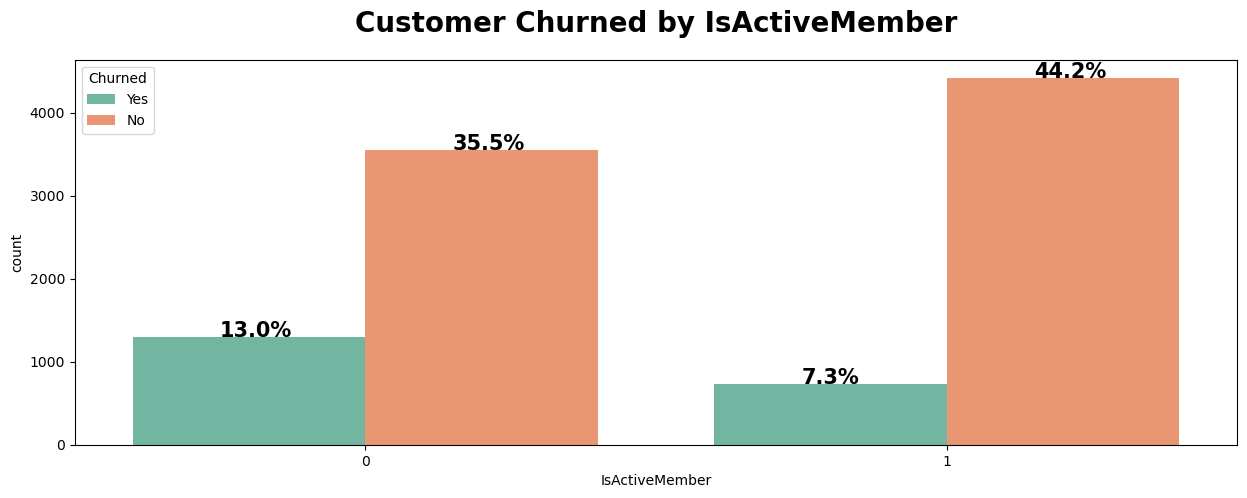

In [44]:
# Visualizing Customer Churned by "IsActiveMember".

countplot("IsActiveMember")

#### There is approxiamately equal customer who are either active or not active.
#### But the churn rate % in not active customers is almost double compared to active customers.
#### So customers which are not active are morely likely to deactivate their banking facilities.
## Recommendation:
#### Bank can provide Regular Communication and Updates, and Enhanced Digital Services so that customers remain active to the banking facilities.

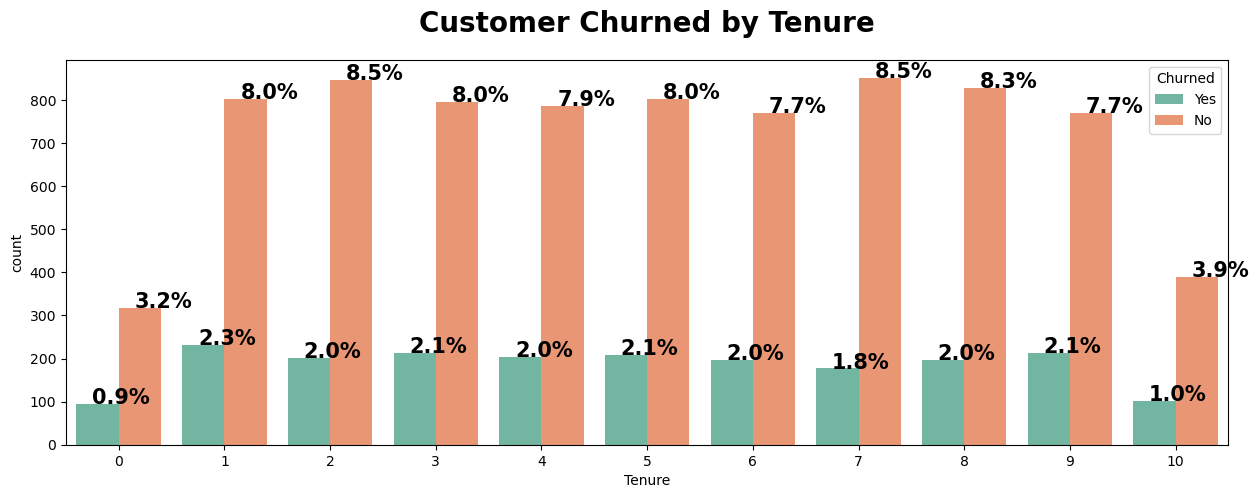

In [45]:
# Visualizing Customer Churned by "Tenure".

countplot("Tenure")

### The highest tenure is 10 years which means that those customers have opened their account 10 years back.
### Since there is almost similar distribution of churn status we can't make any specific inference.

In [49]:
# Visualizing Customer Churned by "CreditScore".

def continous_plot(column):
    plt.figure(figsize=(13,6))
    plt.subplot(1,2,1)
    sns.histplot(x=column,hue="Churned",data=df,kde=True,palette="Set2")
    plt.title(f"Distribution of {column} by Churn Status",fontweight="black",pad=20,size=15)

    plt.subplot(1,2,2)
    sns.boxplot(x="Churned", y=column, data=df, palette="Set2")
    plt.title(f"Distribution of {column} by Churn Status",fontweight="black",pad=20,size=15)
    plt.tight_layout()
    plt.show()

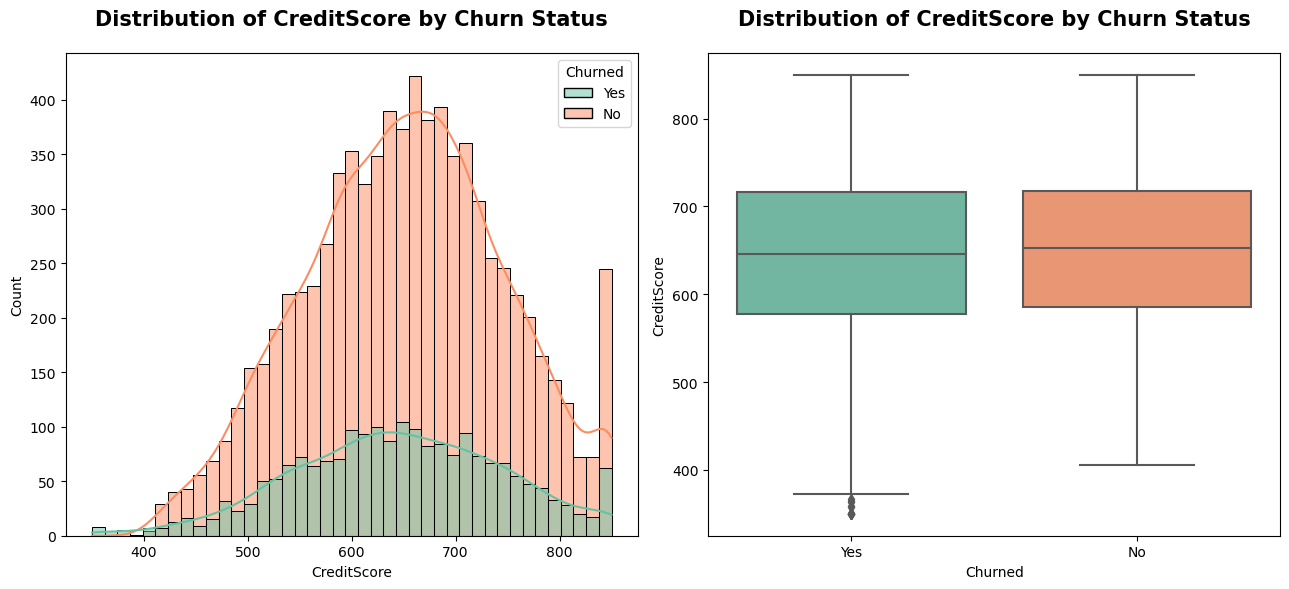

In [50]:
continous_plot("CreditScore")

### The Median CreditScore of both churned and not churned customers are approxiamately equal.
### Since the values are approximately equal for both churn status we can't generate any relevant inference.

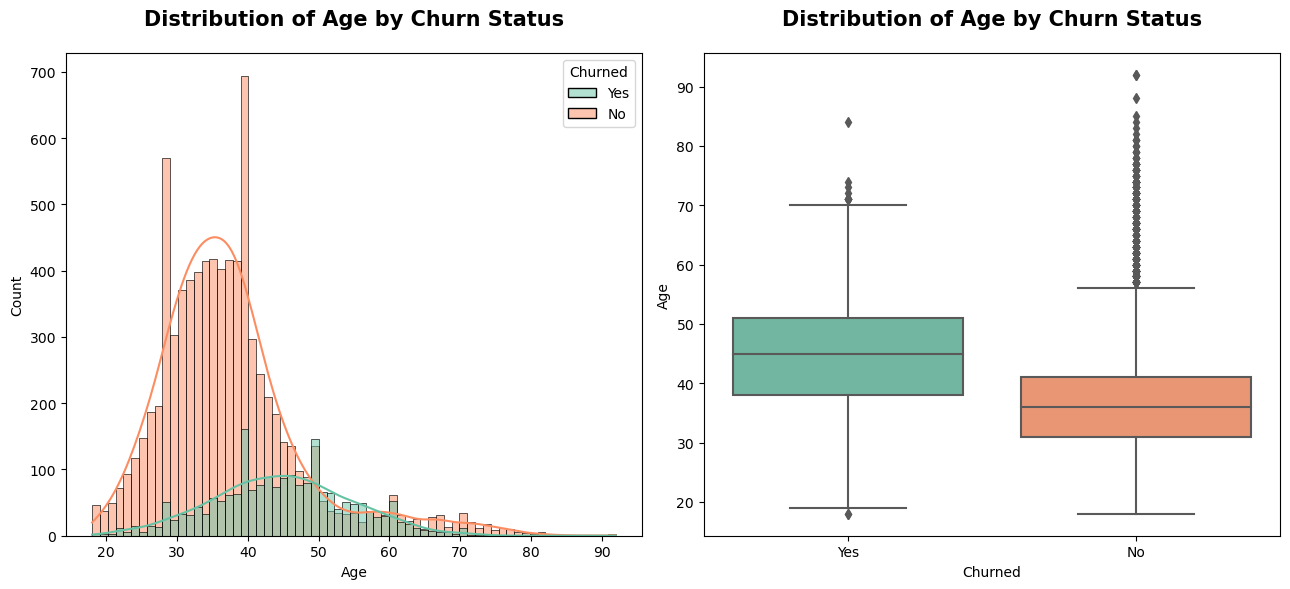

In [51]:
# Visualizing Customer Churned by "Age".

continous_plot("Age")

### The distribution is right skewed because of presence of outliers which can lead to overfitting in model.
### To overcome this right-skewed distribution we can use log normal transformation technique to bring a normal distribution.

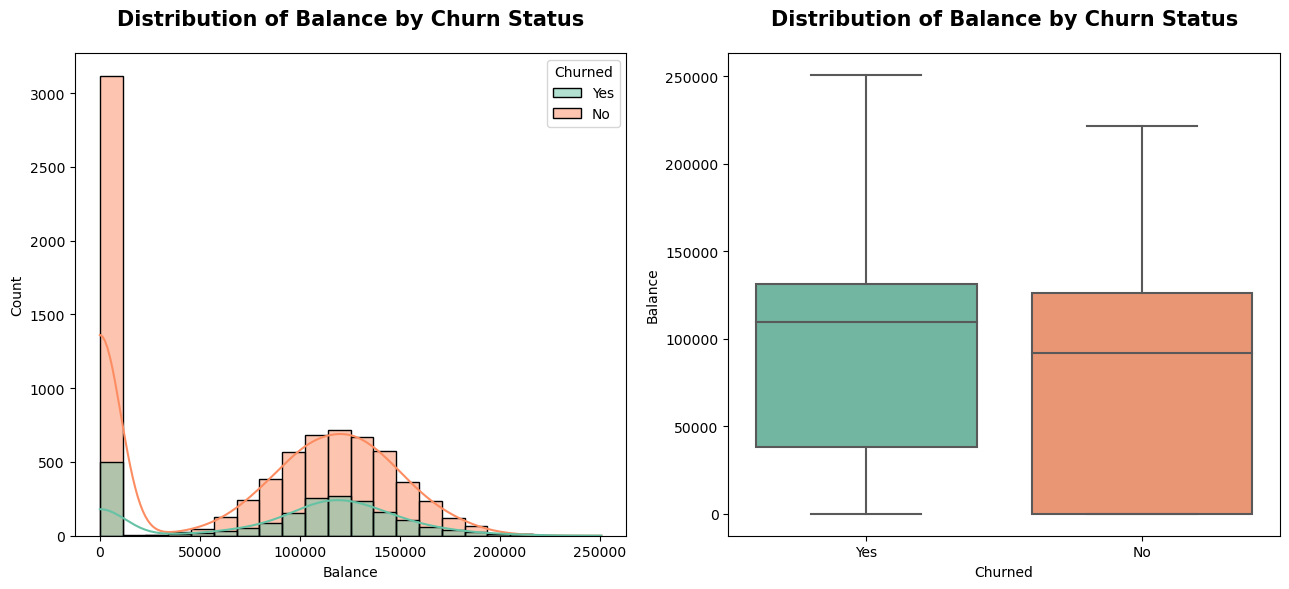

In [52]:
# Visualizing Customer Churned by "Balance"

continous_plot("Balance")

#### More than 3000 customers are having their account balance equal to zero.
#### Customers with zero balance are more likely to deactivate their account.
#### Excluding the zero value we can observe a normal distribution. So don't have to use any other techniques.
## Note:-
#### We can do Feature Engineering by grouping the customers with account balance equal to 0 and balance more than 0 separately.

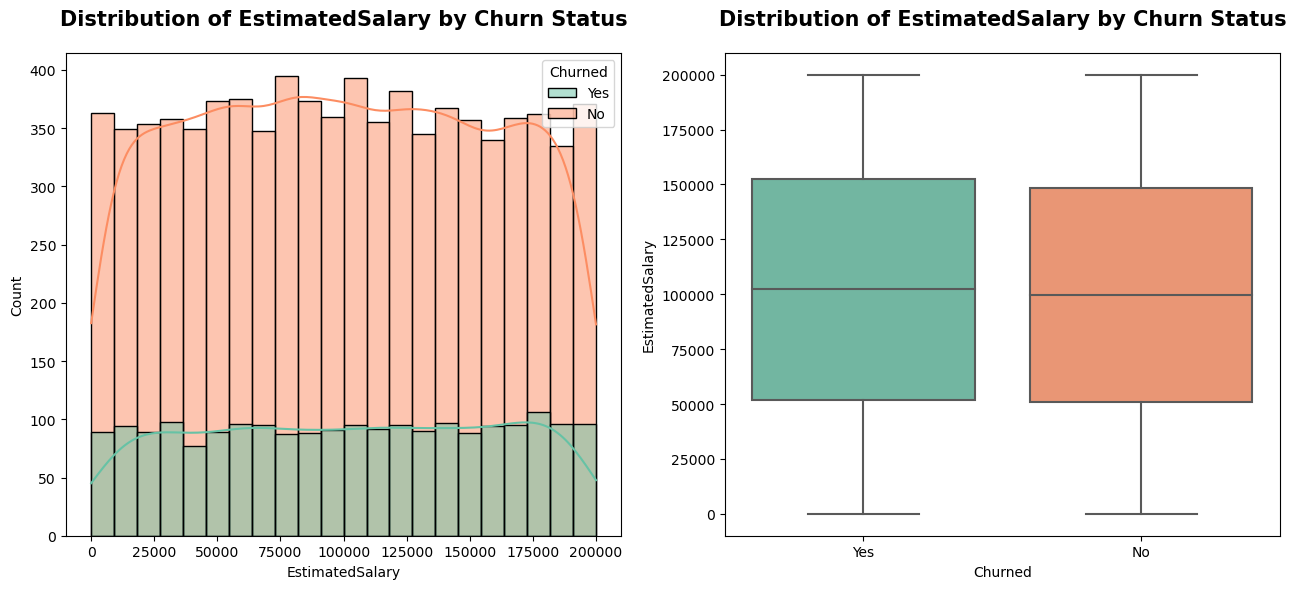

In [53]:
# Visualizing Customer Churned by "Estimated Salary"

continous_plot("EstimatedSalary")

### The median value of EstimatedSalary is approxiamately same for both the churned categories.
### Since the distribution is kind of similar for both churn category we can't make any relevant inference.

# Feature Engineering

In [55]:
#Creating New Feature From "NumOfProducts" Feature.

conditions = [(df['NumOfProducts']==1), (df['NumOfProducts']==2), (df['NumOfProducts']>2)]
values = ['One Product' , 'Two Products', 'More Than 2 Products']

df['Total_Products'] = np.select(conditions, values)

In [56]:
df.drop(columns='NumOfProducts', inplace=True)

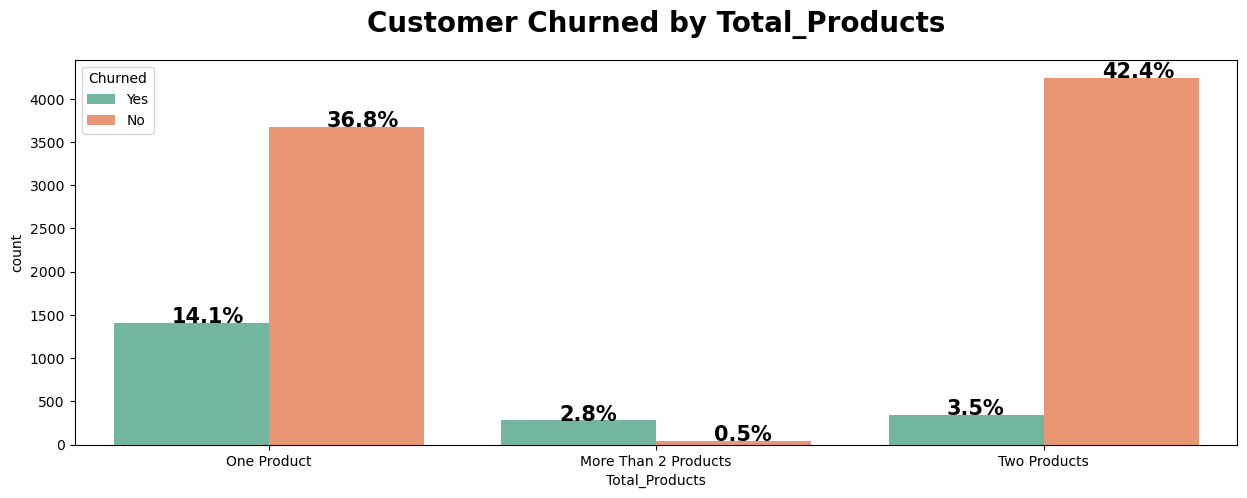

In [57]:
# Visualizing The New Feature "Total_Products"

countplot("Total_Products")

In [59]:
conditions = [(df['Balance']==0), (df['Balance']>0)]
values = ['Zero Balance', 'More Than Zero Balance']

df['Account_Balance'] = np.select(conditions, values)

In [60]:
df.drop(columns='Balance', inplace=True)

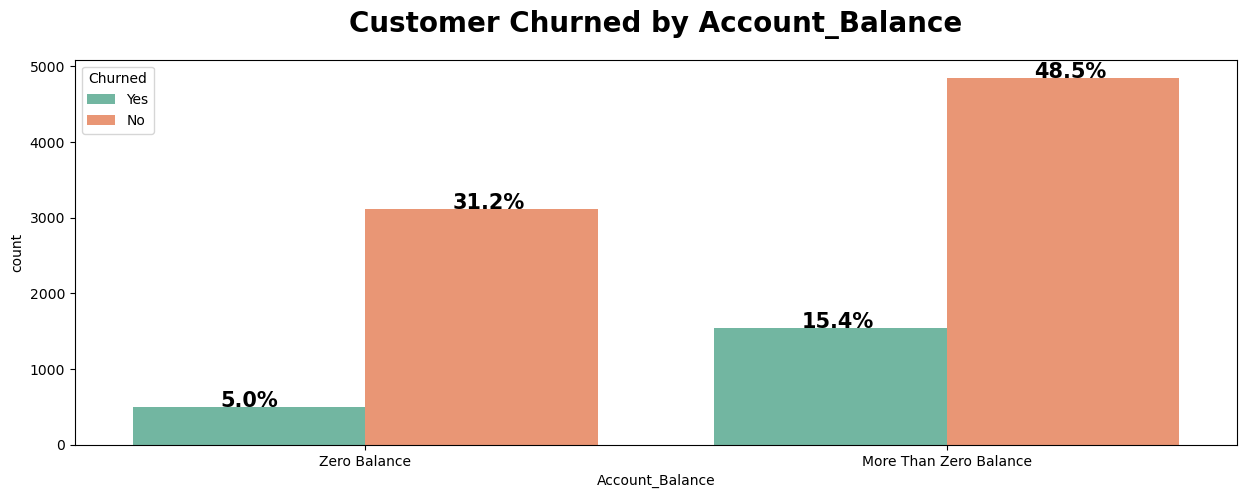

In [61]:
#Visualizing The New Feature "Account_Balance"

countplot("Account_Balance")

# Data Preprocessing

In [63]:
#  Computing Unique Values of Categorical Columns.

cat_cols = ['Geography', 'Gender', 'Total_Products', 'Account_Balance']

for column in cat_cols:
    print(f'Unique values in {column} column is:', df[column].unique())

Unique values in Geography column is: ['France' 'Spain' 'Germany']
Unique values in Gender column is: ['Female' 'Male']
Unique values in Total_Products column is: ['One Product' 'More Than 2 Products' 'Two Products']
Unique values in Account_Balance column is: ['Zero Balance' 'More Than Zero Balance']


In [65]:
# Performing One Hot Encoding on Categorical Features.

df = pd.get_dummies(columns=cat_cols, data= df)

#encoding target variable

df['Churned'].replace({'No':0, 'Yes':1}, inplace=True)

In [66]:
df.head()

,CreditScore,Age,Tenure,HasCrCard,IsActiveMember,EstimatedSalary,Churned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Total_Products_More Than 2 Products,Total_Products_One Product,Total_Products_Two Products,Account_Balance_More Than Zero Balance,Account_Balance_Zero Balance
0,619,42,2,1,1,101348.88,1,1,0,0,1,0,0,1,0,0,1
1,608,41,1,0,1,112542.58,0,0,0,1,1,0,0,1,0,1,0
2,502,42,8,1,0,113931.57,1,1,0,0,1,0,1,0,0,1,0
3,699,39,1,0,0,93826.63,0,1,0,0,1,0,0,0,1,0,1
4,850,43,2,1,1,79084.10,0,0,0,1,1,0,0,1,0,1,0


In [69]:
# Checking Skewness of Continous Features

cols = ["CreditScore","Age","EstimatedSalary"]

df[cols].skew().to_frame().rename(columns={0:'Feature Skewness'})

,Feature Skewness
CreditScore,-0.071607
Age,1.011320
EstimatedSalary,0.002085


#### Age Feature is highly right-skewed , which conveys that there is presence of positive outliers.
#### Skewness can negatively impact the performance of certain machine learning algorithms, like DecisionTree & Linear Models.
#### To overcome the right-skewed distribution we can use log normal transformation to achieve a normal distribution.

In [70]:
#Performing Log Transformation on Age Column

old_age = df['Age']  ##Storing the previous Age values to compare these values with the transformed values.

df['Age'] = np.log(df['Age'])

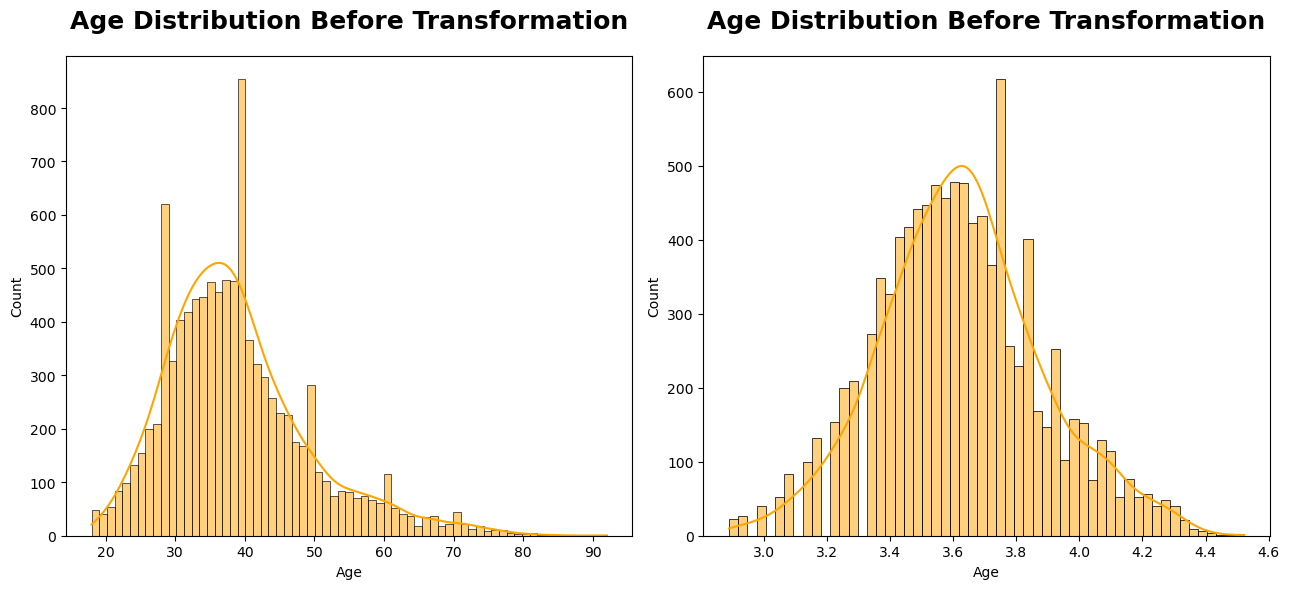

In [72]:
# Visualizing Age Before and After Transformation

plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
sns.histplot(old_age, color='orange', kde=True)
plt.title("Age Distribution Before Transformation",fontweight="black",size=18,pad=20)

plt.subplot(1,2,2)
sns.histplot(df['Age'], color='orange', kde=True)
plt.title("Age Distribution Before Transformation",fontweight="black",size=18,pad=20)
plt.tight_layout()
plt.show()

### After applying log normal transformation the age feature has achieved a normal distribution.
### This will help model to find more relevant patterns and build a more accurate model.

In [74]:
# Segregating Features & Labels for Model Training

X = df.drop(columns= ['Churned'])
Y = df['Churned']

In [75]:
#Splitting Data For Model Training & Testing

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2, random_state=0)

print("Shape of x_train is:",x_train.shape)
print("Shape of x_test is: ",x_test.shape)
print("Shape of y_train is:",y_train.shape)
print("Shape of y_test is: ",y_test.shape)

Shape of x_train is: (8000, 16)
Shape of x_test is:  (2000, 16)
Shape of y_train is: (8000,)
Shape of y_test is:  (2000,)


#### * Data is **equally splitted** for **Model Training & Testing.** * So we can build a **Predictive Model** to find the **key factors** that are significantly influencing **customers churn.**

In [77]:
# Applying SMOTE to Overcome the Class-Imbalance in Target Variable.

from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=42)

In [78]:
x_train_resampled, y_train_resampled = smt.fit_resample(x_train, y_train)

print(x_train_resampled.shape, y_train_resampled.shape)

(12736, 16) (12736,)


In [79]:
y_train_resampled.value_counts().to_frame()

,Churned
0,6368
1,6368


### Both the categories in Target variable are now having equal number of records.
### So we can train the Model on balanced records for both churn categories and make a predictive model with low bias.

# Model Creation using DecisionTree

In [81]:
# Performing Grid-Search with cross-validation to find the best Parameters for the Model

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV

dtree = DecisionTreeClassifier()


In [82]:
param_grid = {"max_depth":[3,4,5,6,7,8,9,10],
              "min_samples_split":[2,3,4,5,6,7,8],
              "min_samples_leaf":[1,2,3,4,5,6,7,8],
              "criterion":["gini","entropy"],
              "splitter":["best","random"],
              "max_features":["auto",None],
              "random_state":[0,42]}
grid_search = GridSearchCV(dtree, param_grid, cv=5, n_jobs=-1)

grid_search.fit(x_train_resampled,y_train_resampled)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', None],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8],
                         'random_state': [0, 42],
                         'splitter': ['best', 'random']})

In [84]:
#Fetching the Best Parameters for DecisionTree Model

best_parameters = grid_search.best_params_
print("Best Parameters for DecisionTree Model is:\n")
best_parameters

Best Parameters for DecisionTree Model is:



{'criterion': 'gini',
 'max_depth': 8,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 7,
 'random_state': 42,
 'splitter': 'random'}

In [86]:
#Creating DecisionTree Model Using Best Parameters

dtree = DecisionTreeClassifier(**best_parameters)
dtree.fit(x_train_resampled,y_train_resampled)

DecisionTreeClassifier(max_depth=8, min_samples_split=7, random_state=42,
                       splitter='random')

In [88]:
from sklearn.metrics import accuracy_score, precision_score, recall_score ,f1_score
y_train_pred = dtree.predict(x_train_resampled)
y_test_pred = dtree.predict(x_test)

print("Accuracy Score of Model on Training Data is =>", round(accuracy_score(y_train_resampled,y_train_pred)*100,2),'%')
print("Accuracy Score of Model on Testing Data  is =>",round(accuracy_score(y_test,y_test_pred)*100,2),"%")

Accuracy Score of Model on Training Data is => 89.51 %
Accuracy Score of Model on Testing Data  is => 84.3 %


In [89]:
# Model Evaluation using Different Metric Values

print("F1 Score of the Model is =>",f1_score(y_test,y_test_pred,average="micro"))
print("Recall Score of the Model is =>",recall_score(y_test,y_test_pred,average="micro"))
print("Precision Score of the Model is =>",precision_score(y_test,y_test_pred,average="micro"))

F1 Score of the Model is => 0.843
Recall Score of the Model is => 0.843
Precision Score of the Model is => 0.843


#### We can observe that recall, precision, and F1 score are all the same, it means that our model is achieving perfect balance between correctly identifying positive samples (recall) and minimizing false positives (precision).
#### The high values for F1 score, recall score, and precision score, all of which are approximately 0.8. These metrics suggest that the model achieves good accuracy in predicting the positive class.

In [90]:
#Finding Importance of Features in DecisionTreeClassifier

imp_df = pd.DataFrame({'Feature Name': x_train.columns, 'Importance': dtree.feature_importances_})

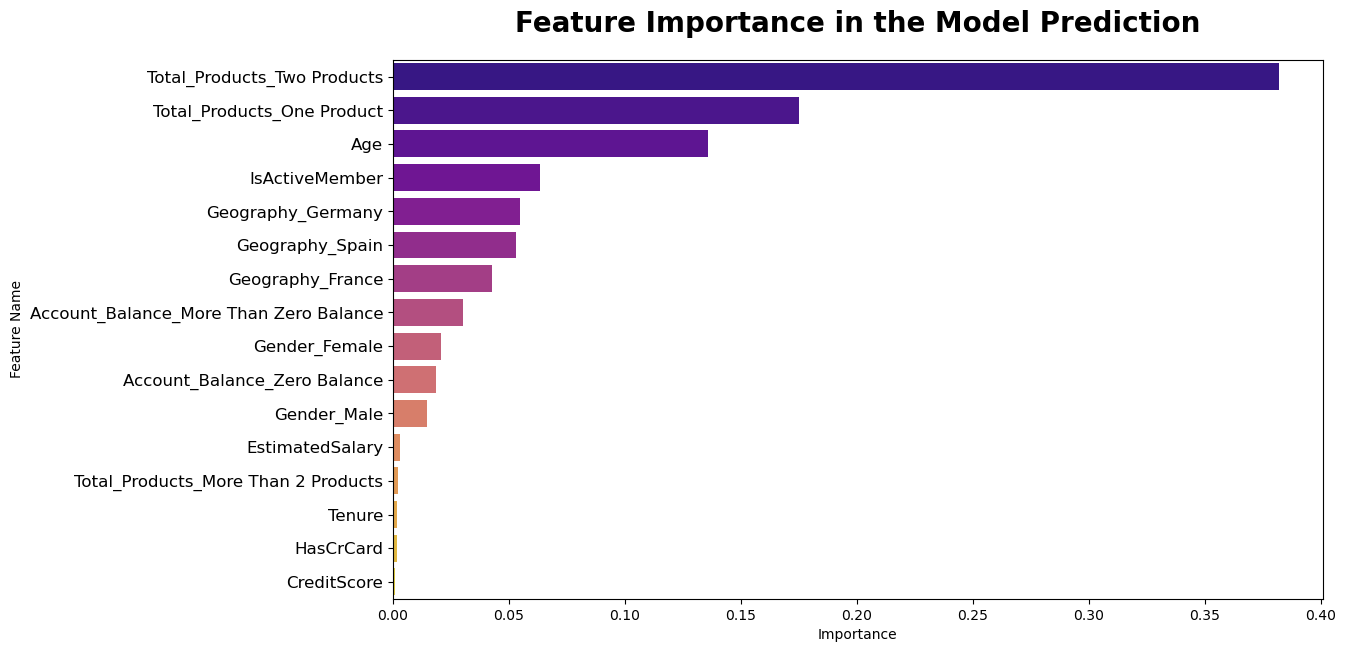

In [91]:
features = imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12,7))
sns.barplot(x='Importance', y='Feature Name', data=features, palette="plasma")
plt.title("Feature Importance in the Model Prediction", fontweight="black", size=20, pad=20)
plt.yticks(size=12)
plt.show()

#### The key factors that significantly influence the deactivation of customers banking facilities are:-
#### Total_Products, Age, IsActiveMember, Geography, Balance and Gender.
#### The minimal impact of features on the deactivation of customers' banking facilities are:- CreditScore, HasCrCard, Tenure and EstimatedSalary

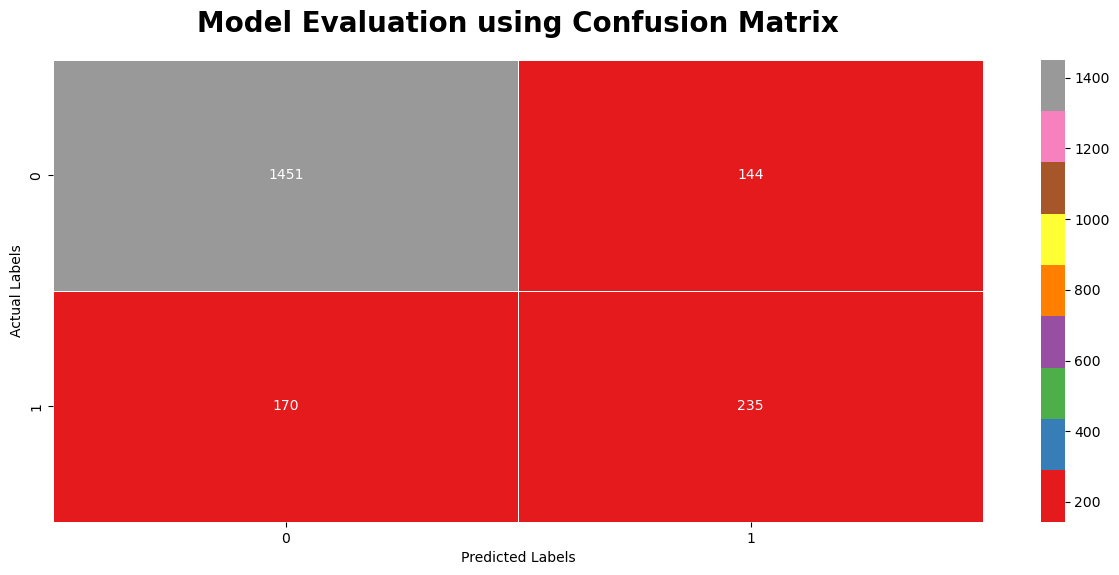

In [101]:
# Model Evaluation using Confusion Matrix

cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(15,6))
sns.heatmap(data=cm, linewidth=.5, annot=True, fmt="g", cmap="Set1")
plt.title("Model Evaluation using Confusion Matrix",fontsize=20,pad=20,fontweight="black")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")
plt.show()

### Strong True Positive Rate:** The model achieved a high number of true positive predictions, indicating its ability to correctly identify positive cases. This suggests that the model is effective in accurately classifying the desired outcome. 
### Need of Improvement in False Negative Rate:** The presence of a relatively high number of false negatives suggests that the model may have missed identifying some actual positive cases. This indicates a need for further refinement to enhance the model's ability to capture all positive cases.

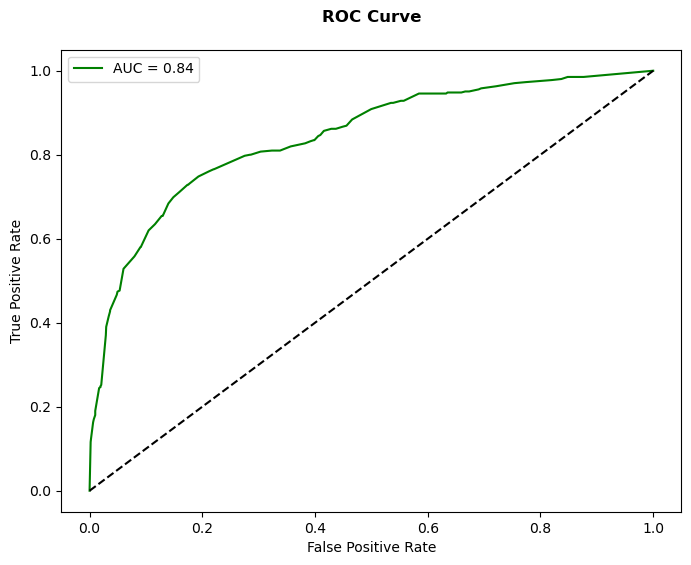

In [102]:
# Model Evaluation: ROC Curve and Area Under the Curve (AUC)

y_pred_proba = dtree.predict_proba(x_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=["y_actual"])])
df_actual_predicted.index = y_test.index


fpr, tpr, thresholds = roc_curve(df_actual_predicted["y_actual"], y_pred_proba)
auc = roc_auc_score(df_actual_predicted["y_actual"], y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}",color="green")
plt.plot([0, 1], [0, 1], linestyle="--", color="black")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve",pad=20,fontweight="black")
plt.legend()
plt.show()

### An AUC (Area Under the Curve) value of 0.84 suggests that the model has strong discriminative power.
### This suggests that the model has a high ability to distinguish between positive and negative instances, indicating its effectiveness in making accurate predictions.
### The model has a relatively high probability of ranking a randomly selected positive instance higher than a randomly selected negative instance

# Conclusion

## Key Factors Influencing Customer Churn:
##### The main factors that significantly contribute to the deactivation of customer banking services are Total Products, Age, IsActiveMember status, Gender, and Geography.

### Model Performance:
#### High Training and Testing Accuracy: Both models demonstrated strong accuracy, with around 90% accuracy on the training data, indicating a well-fitted model. The model also achieved approximately 85% accuracy on the test data, showcasing its ability to generalize well to unseen data.

#### High F1 Score, Recall, and Precision: The model performed consistently across various metrics, with F1 score, recall, and precision all near 0.8, reflecting its ability to correctly identify positive churn cases while minimizing false positives and maximizing true positives.

#### High AUC Score: The model achieved an AUC score above 0.8, indicating strong discriminatory power. This suggests that the model is effective in distinguishing between customers who are likely to churn and those who are not.

### Overall Performance:
##### The model exhibits robust performance across multiple evaluation metrics, making it a reliable tool for predicting customer churn and identifying factors that influence churn decisions.

## Recommendations for the Bank:
#### Encourage More Products: The bank should encourage customers to hold at least two banking products, as fewer products are linked to a higher likelihood of churn.

#### Engage Senior Citizens: Launch targeted schemes for senior citizens to reduce the likelihood of them deactivating their banking services.

#### Customer Retention Strategies: Implement rewards and incentive programs, maintain regular communication and updates, and enhance digital services to keep customers engaged and reduce churn.

